## Credict Card Application Fraud Detection 
-- Finding the probability of a customer leading fraud 

Unsupervised learning using Self Organising Maps - to identify which customer may lead to fraud 

In [48]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [49]:
df = pd.read_csv('Self_Organizing_Maps/Credit_Card_Applications.csv')
X = df.iloc[:, :-1].values
# Class refers if the customers application is approved by bank. 
# Basically we are going to segment customer 
Y = df.iloc[:, -1].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

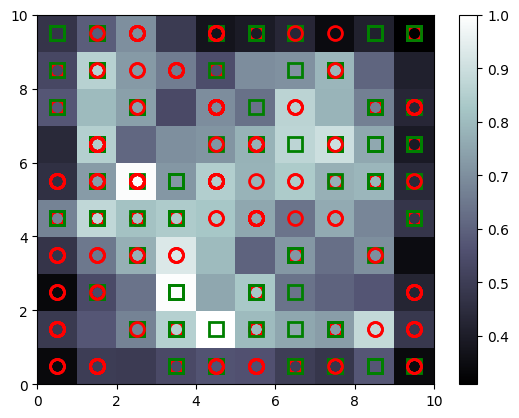

In [50]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)
from pylab import bone, pcolor, colorbar, plot, show
bone()
# identify fraudulent customer as the customer having
# maximum mean interneuron distance (MID)
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i,x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5, w[1]+0.5, markers[Y[i]], markeredgecolor = colors[Y[i]], markerfacecolor = 'None', 
         markersize = 10, markeredgewidth = 2)

In [52]:
# As our model initialise with random values the coordinates of whitest neuron may change 
# depending upom where the fraud customer is alloted initially or which neuron is the winning neuron for that case.

mappings = som.win_map(X)
frauds = np.concatenate((mappings[(4,1)], mappings[(2, 5)]), axis=0)
frauds_list = sc.inverse_transform(frauds)
fraudulent_customerID = [row[0] for row in frauds_list]
for i in fraudulent_customerID:
    print(i)

15673907.0
15662854.0
15610042.0
15568162.0
15638983.0
15662152.0
15623210.0
15734578.0
15579583.0
15570508.0
15641733.0
15660144.0
15603565.0
15664720.0
15627328.0
15617991.0
15696120.0
15567919.0
15687634.0
15638751.0
15641007.0
15665014.0
15606554.0


Supervised Learning using ANN - to get the probabilities

In [63]:
customers = df.iloc[:, 1:]
customers.shape

(690, 15)

In [64]:
# creating a dependent variable for ann model training using the results we get from unsupervised SOM.
is_fraud = np.zeros(len(df))

In [65]:
for i in range(len(df)):
    if df.iloc[i,0] in fraudulent_customerID: 
        is_fraud[i] = 1

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [67]:
from keras.models import Sequential
from keras.layers import Dense
ann = Sequential()
ann.add(Dense(units=32, activation='relu', input_dim = 15))
ann.add(Dense(units=8, activation='relu'))
ann.add(Dense(units=1, activation='sigmoid'))

In [68]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann.fit(customers, is_fraud, batch_size=10, epochs=50)

Epoch 1/50


69/69 [==============================] - 1s 960us/step - loss: 0.6380 - accuracy: 0.6710
Epoch 2/50
69/69 [==============================] - 0s 1ms/step - loss: 0.3291 - accuracy: 0.9652
Epoch 3/50
69/69 [==============================] - 0s 882us/step - loss: 0.1598 - accuracy: 0.9667
Epoch 4/50
69/69 [==============================] - 0s 897us/step - loss: 0.1136 - accuracy: 0.9667
Epoch 5/50
69/69 [==============================] - 0s 2ms/step - loss: 0.0911 - accuracy: 0.9667
Epoch 6/50
69/69 [==============================] - 0s 943us/step - loss: 0.0756 - accuracy: 0.9652
Epoch 7/50
69/69 [==============================] - 0s 893us/step - loss: 0.0647 - accuracy: 0.9710
Epoch 8/50
69/69 [==============================] - 0s 861us/step - loss: 0.0554 - accuracy: 0.9754
Epoch 9/50
69/69 [==============================] - 0s 880us/step - loss: 0.0486 - accuracy: 0.9826
Epoch 10/50
69/69 [==============================] - 0s 916us/step - loss: 0.0435 - accuracy: 0.9870
Epoch 11/50
69

In [69]:
# propability that a particular customer lead to fraud 
predictions = ann.predict(customers)

22/22 [==============================] - 0s 621us/step


In [70]:
predictions.shape

(690, 1)

In [71]:
predictions = np.concatenate((df.iloc[:,0:1], predictions), axis = 1)

In [72]:
predictions.shape

(690, 2)

In [73]:
print(predictions)

[[1.57761560e+07 1.71855162e-03]
 [1.57395480e+07 8.99751176e-05]
 [1.56628540e+07 9.86195028e-01]
 ...
 [1.56754500e+07 4.53464781e-06]
 [1.57764940e+07 1.09567100e-09]
 [1.55924120e+07 1.08008213e-09]]


In [46]:
# Finding the probabilities of top fraudulent customers 
predictions = predictions[predictions[:, 1].argsort()]

In [47]:
print(predictions)

[[1.57761560e+07 0.00000000e+00]
 [1.57649220e+07 0.00000000e+00]
 [1.56640830e+07 0.00000000e+00]
 ...
 [1.56152960e+07 2.62751622e-04]
 [1.56647930e+07 4.56496055e-04]
 [1.57523440e+07 5.87693125e-04]]
